In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
import random

from sklearn.decomposition import PCA as sklearnPCA

In [50]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(url,header=None)

y = data[4] #classifications
X = data.iloc[:,0:4] #features

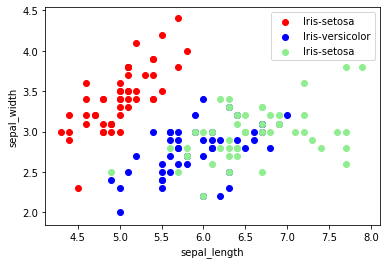

In [9]:
#three different scatter series
plt.scatter(X[y=='Iris-setosa'].iloc[:,0], X[y=='Iris-setosa'].iloc[:,1], label= 'Iris-setosa', c='red')
plt.scatter(X[y=='Iris-versicolor'].iloc[:,0], X[y=='Iris-versicolor'].iloc[:,1], label= 'Iris-versicolor', c='blue')
plt.scatter(X[y=='Iris-virginica'].iloc[:,0], X[y=='Iris-virginica'].iloc[:,1], label= 'Iris-setosa', c='lightgreen')

#prettify the graph
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

#display
plt.show()

In [10]:
X_norm = (X - X.min())/(X.max() - X.min())

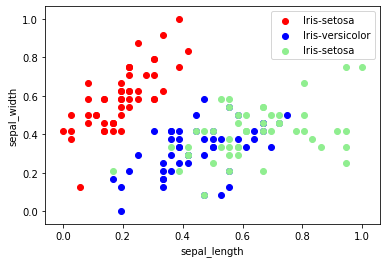

In [12]:
#three different scatter series
plt.scatter(X_norm[y=='Iris-setosa'].iloc[:,0], X_norm[y=='Iris-setosa'].iloc[:,1], label= 'Iris-setosa', c='red')
plt.scatter(X_norm[y=='Iris-versicolor'].iloc[:,0], X_norm[y=='Iris-versicolor'].iloc[:,1], label= 'Iris-versicolor', c='blue')
plt.scatter(X_norm[y=='Iris-virginica'].iloc[:,0], X[y=='Iris-virginica'].iloc[:,1], label= 'Iris-setosa', c='lightgreen')

#prettify the graph
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

#display
plt.show()

In [14]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

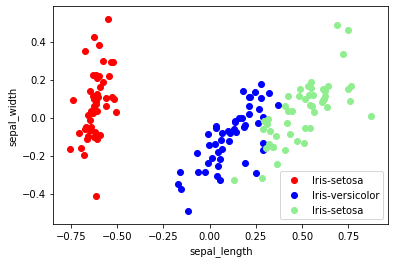

In [17]:
#three different scatter series
plt.scatter(transformed[y=='Iris-setosa'].iloc[:,0], transformed[y=='Iris-setosa'].iloc[:,1], label= 'Iris-setosa', c='red')
plt.scatter(transformed[y=='Iris-versicolor'].iloc[:,0], transformed[y=='Iris-versicolor'].iloc[:,1], label= 'Iris-versicolor', c='blue')
plt.scatter(transformed[y=='Iris-virginica'].iloc[:,0], transformed[y=='Iris-virginica'].iloc[:,1], label= 'Iris-setosa', c='lightgreen')

#prettify the graph
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

#display
plt.show()

In [36]:
from pandas.plotting import scatter_matrix

df = pd.read_csv('wine.data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
1,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
3,1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480


In [64]:
y = df[0] #classifications
y.head()
X = df.iloc[:,1:14] #features

X.columns = X.iloc[:1].values.tolist()[0]
X.drop(X.head(1).index, inplace=True)x
X = X.astype(float)

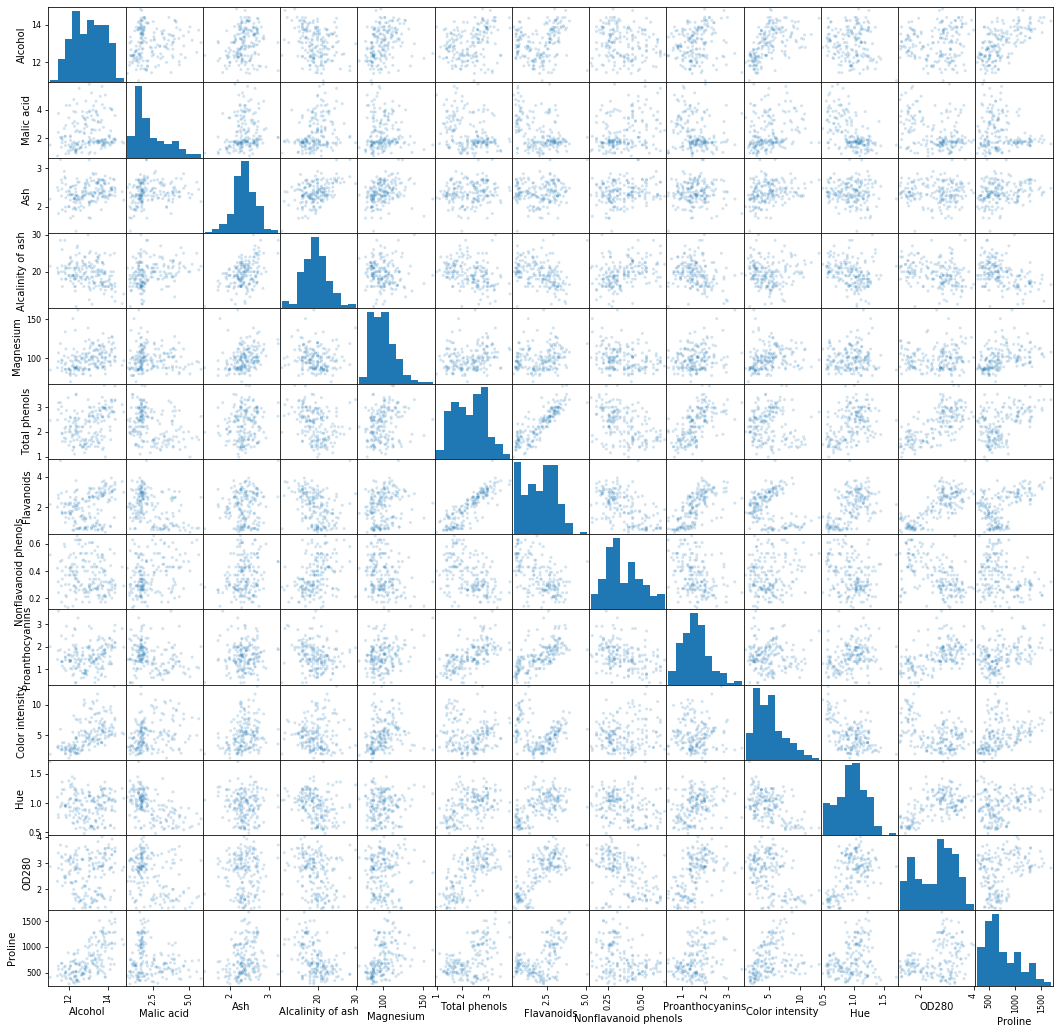

In [70]:
scatter_matrix(X, alpha=0.2, figsize=(18, 18))
plt.show()

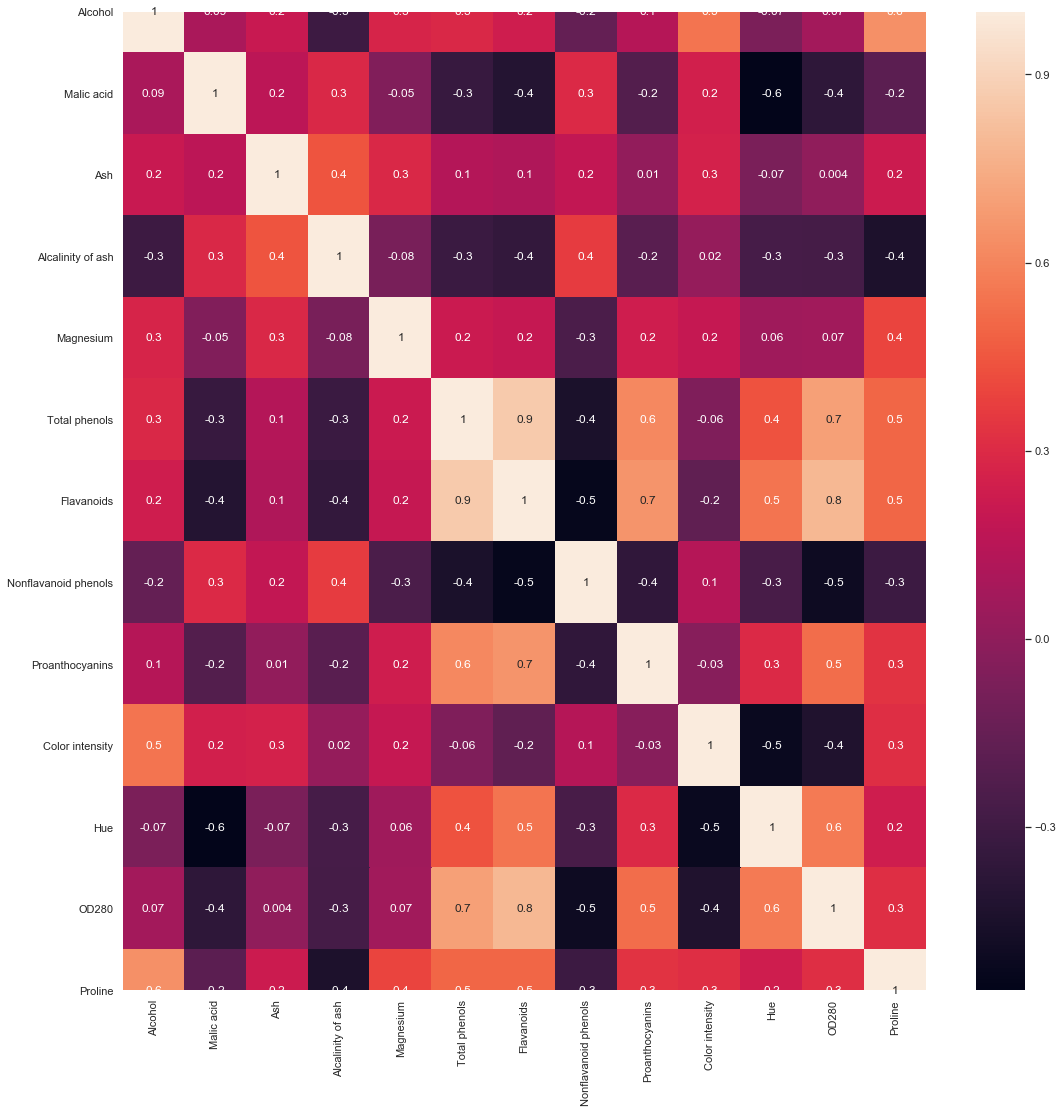

In [81]:
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(X.corr(), annot = True, fmt='.1g')

Attributes with large correlations are:
 - Flavanoids and Total Phenols
 - Flavanoids and Proanthocyanins
 - Flavanoids and OD280
 - Proline and Alcohol
 - Total Phenols and Proanthocyanins

In [93]:
standardScaler = preprocessing.StandardScaler()
standardScaler.fit(X)
X_scaled_array = standardScaler.transform(X)
normalizedData = pd.DataFrame(X_scaled_array, columns = X.columns)
normalizedData.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


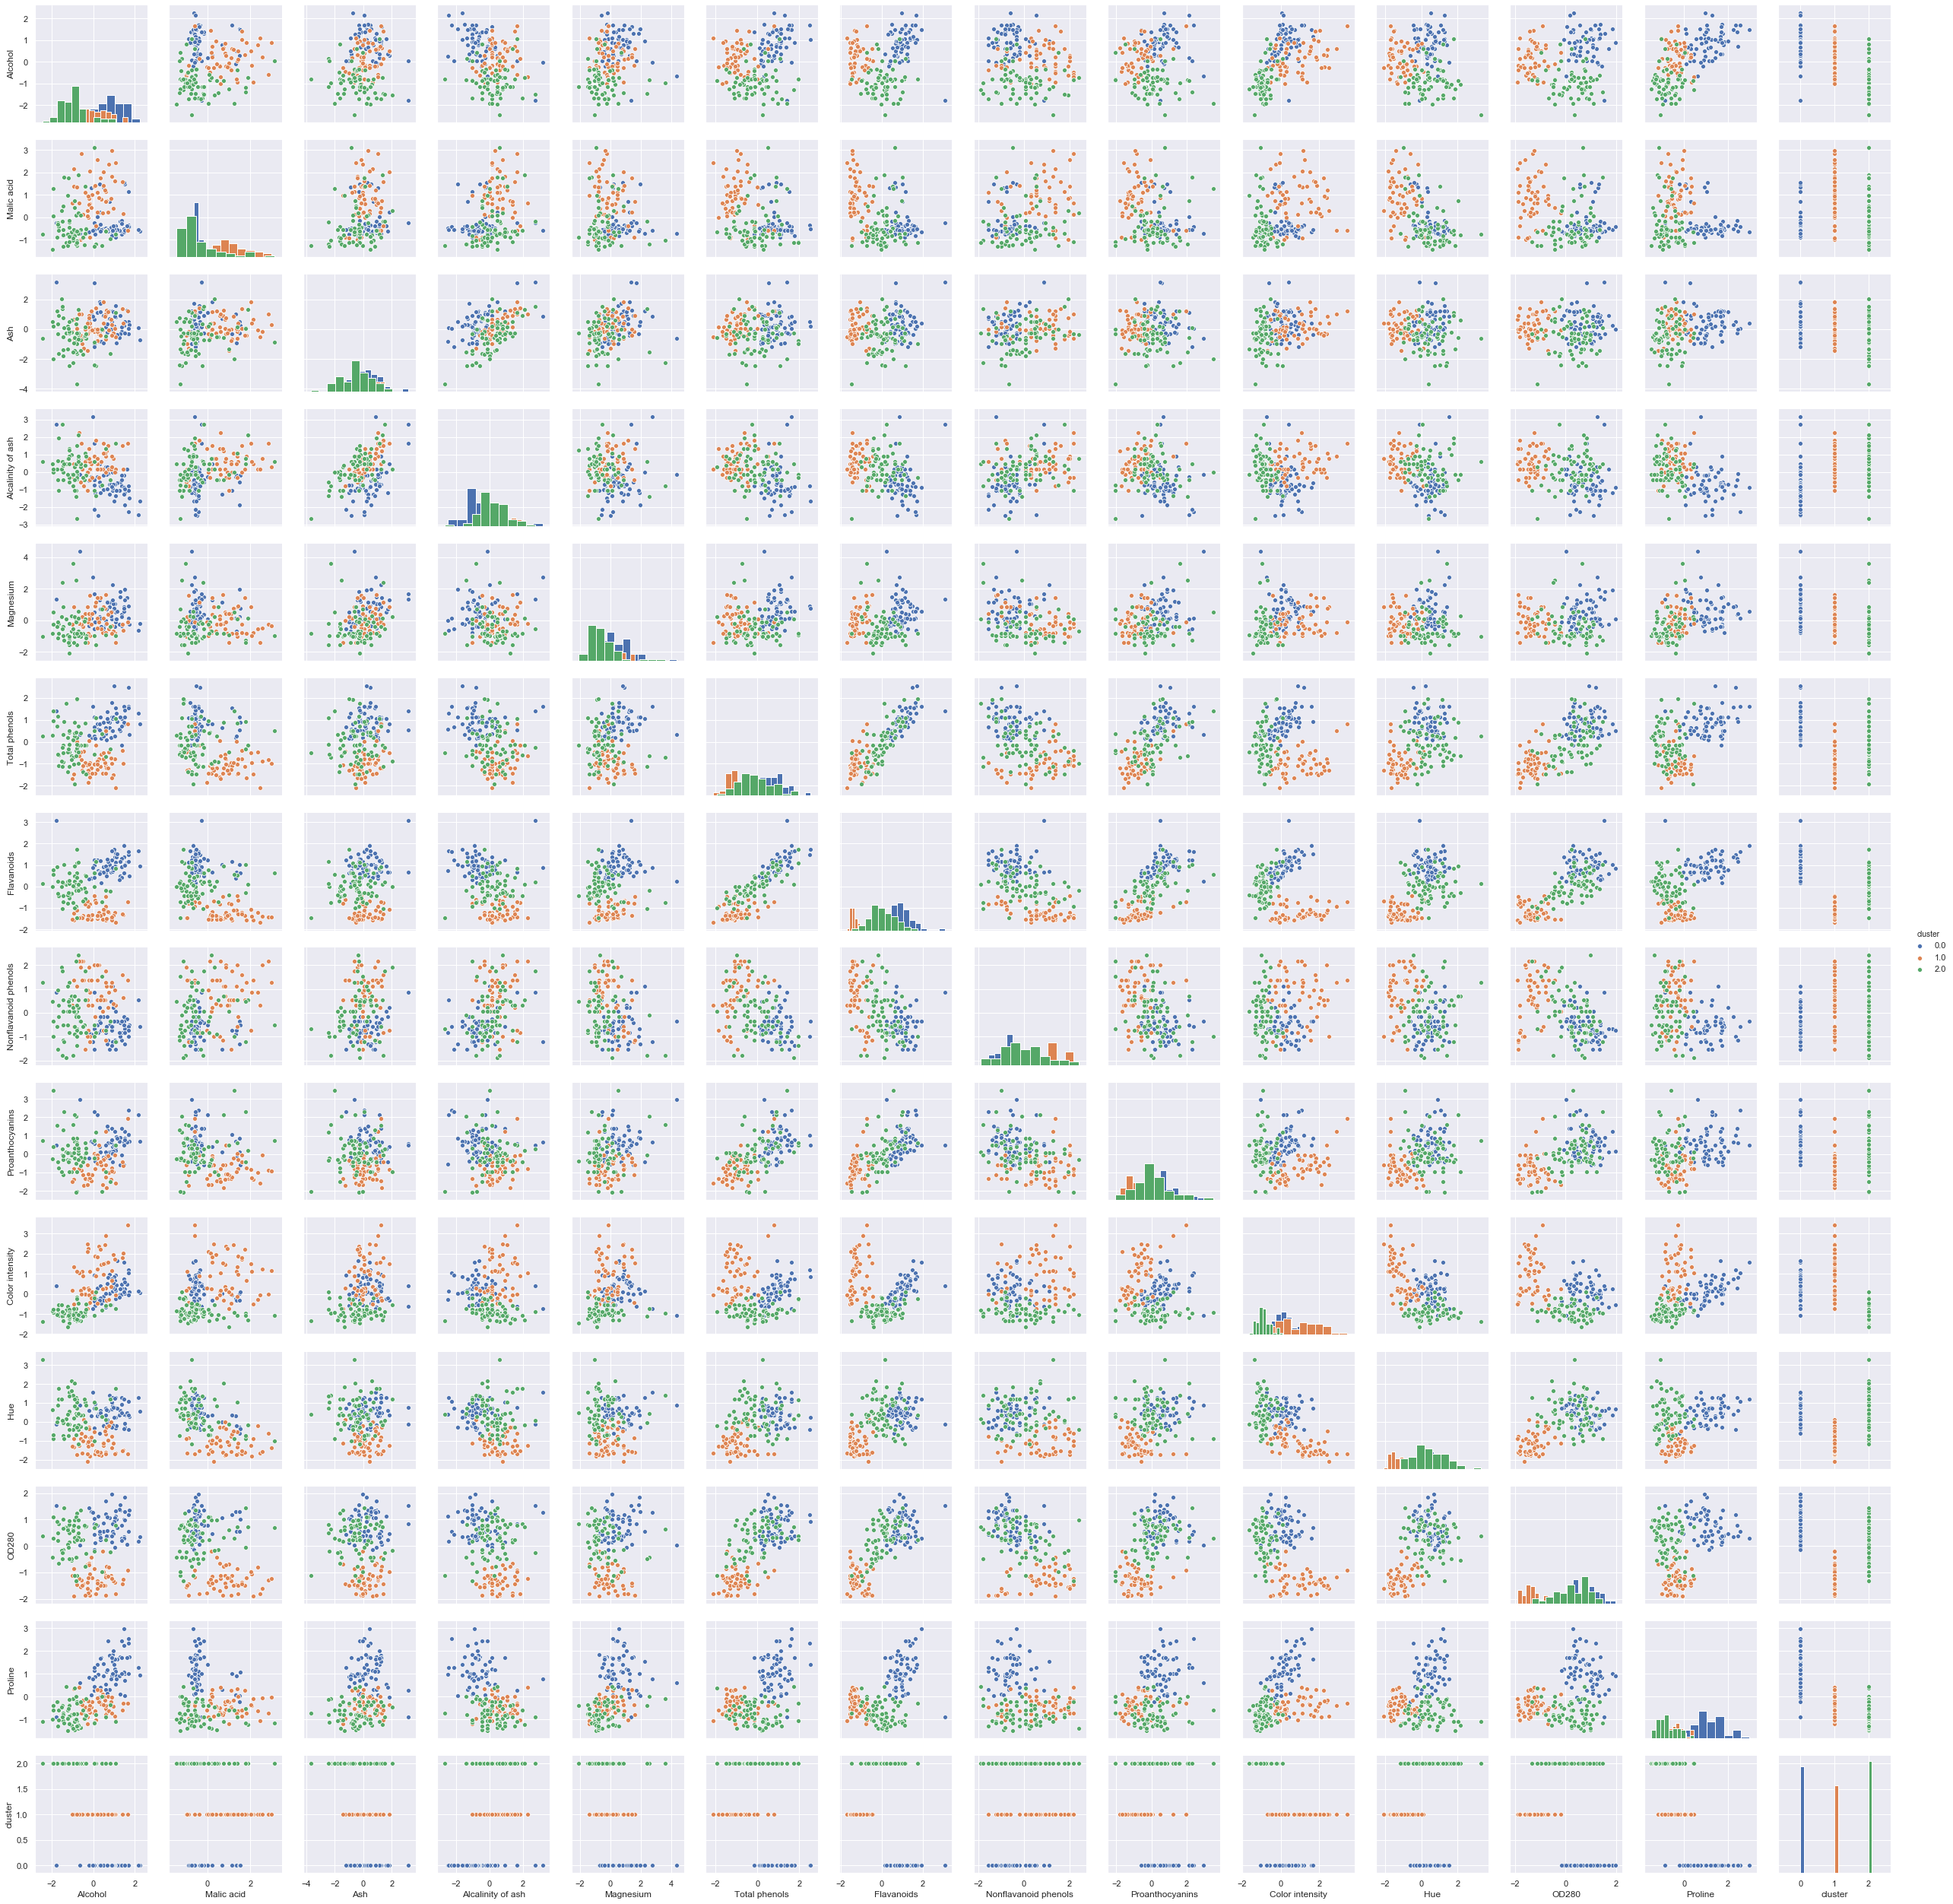

In [116]:
kMeansClustering = KMeans(n_clusters = 3, random_state=random.seed())
res = kMeansClustering.fit_predict(normalizedData)
normalizedData ["cluster"] = res.astype('float64')
sns_plot = sns.pairplot(normalizedData, hue = "cluster",diag_kind="hist")